In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [2]:
AlzData = pd.read_csv('/Users/booba/Downloads/alzheimers_prediction_dataset.csv')

In [10]:
print((AlzData.head(5)))

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High      

In [11]:
print(AlzData.isnull().sum())

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [12]:
print(AlzData.duplicated().sum())

0


In [13]:
print(AlzData.columns)

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')


In [3]:
from pandas_profiling import ProfileReport



# Crée le rapport Pandas Profiling
profile = ProfileReport(AlzData, title="Profiling Report - Alzheimer Data", explorative=True)

# Sauvegarde le rapport dans un fichier HTML
profile.to_file("/Users/booba/Desktop/mon_environnement/AlzData_rapport_profiling.html")


/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_1742/1260037322.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

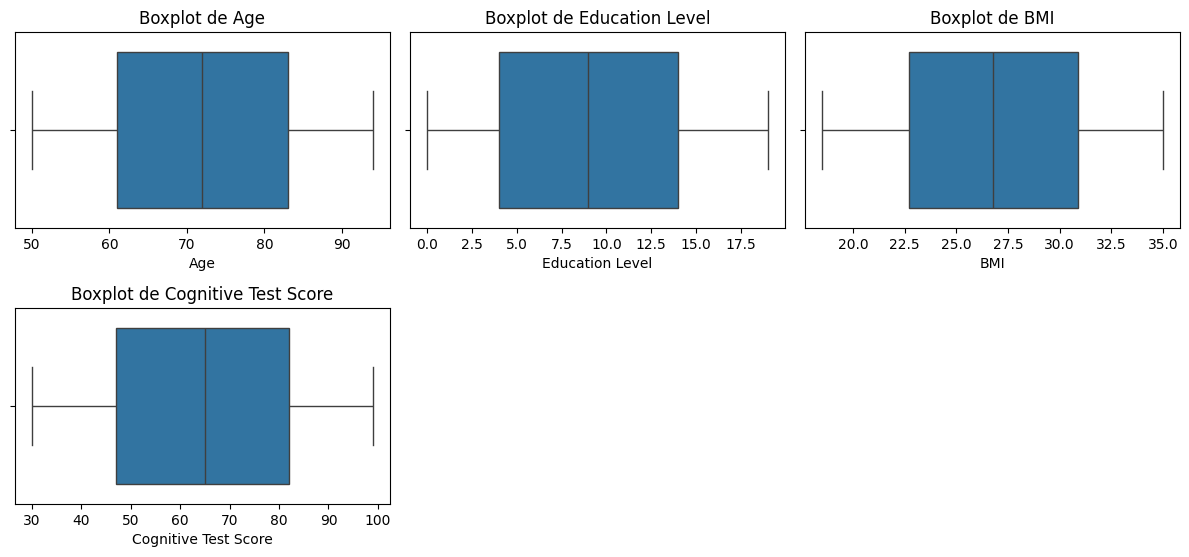

In [13]:
# Sélectionner les colonnes numériques
numerical_columns = AlzData.select_dtypes(include=['float64', 'int64']).columns

# Afficher les outliers avec boxplot
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Ajuster la disposition des sous-graphes
    sns.boxplot(x=AlzData[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

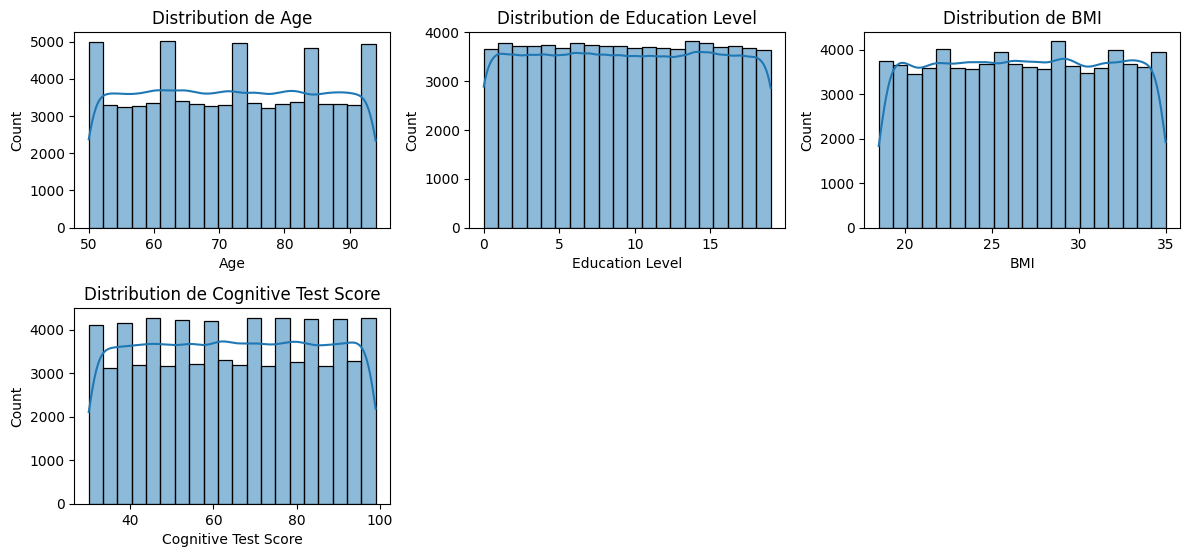

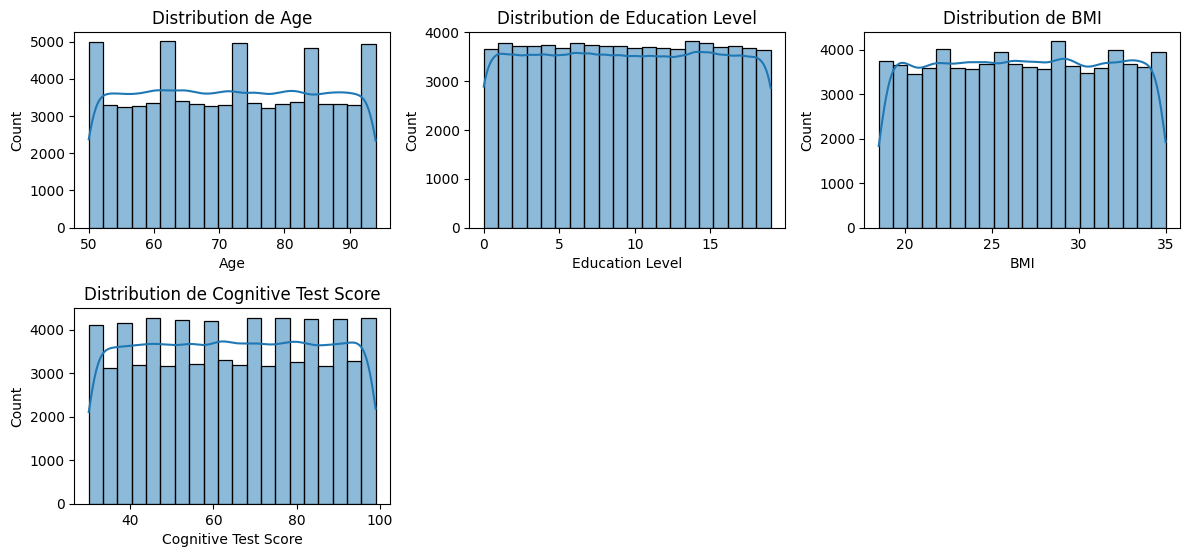

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Sélectionner les colonnes numériques
numerical_columns = AlzData.select_dtypes(include=['float64', 'int64']).columns

# Tracer la distribution des données pour chaque colonne numérique
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Ajuster la disposition des sous-graphes en fonction du nombre de colonnes
    sns.histplot(AlzData[col], kde=True, bins=20)
    plt.title(f"Distribution de {col}")

plt.tight_layout()
plt.show()


In [14]:
# Encodage des variables catégoriques
label_encoders = {}
for col in AlzData.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    AlzData[col] = label_encoders[col].fit_transform(AlzData[col])

In [15]:
print((AlzData.head(5)))

   Country  Age  Gender  Education Level   BMI  Physical Activity Level  \
0       16   90       1                1  33.0                        2   
1        0   72       1                7  29.9                        2   
2       14   86       0               19  22.9                        0   
3        4   53       1               17  31.2                        1   
4       17   58       0                3  30.0                        0   

   Smoking Status  Alcohol Consumption  Diabetes  Hypertension  ...  \
0               2                    1         0             0  ...   
1               1                    0         0             0  ...   
2               0                    1         0             1  ...   
3               2                    2         1             0  ...   
4               1                    0         1             0  ...   

   Dietary Habits  Air Pollution Exposure  Employment Status  Marital Status  \
0               1                       0 

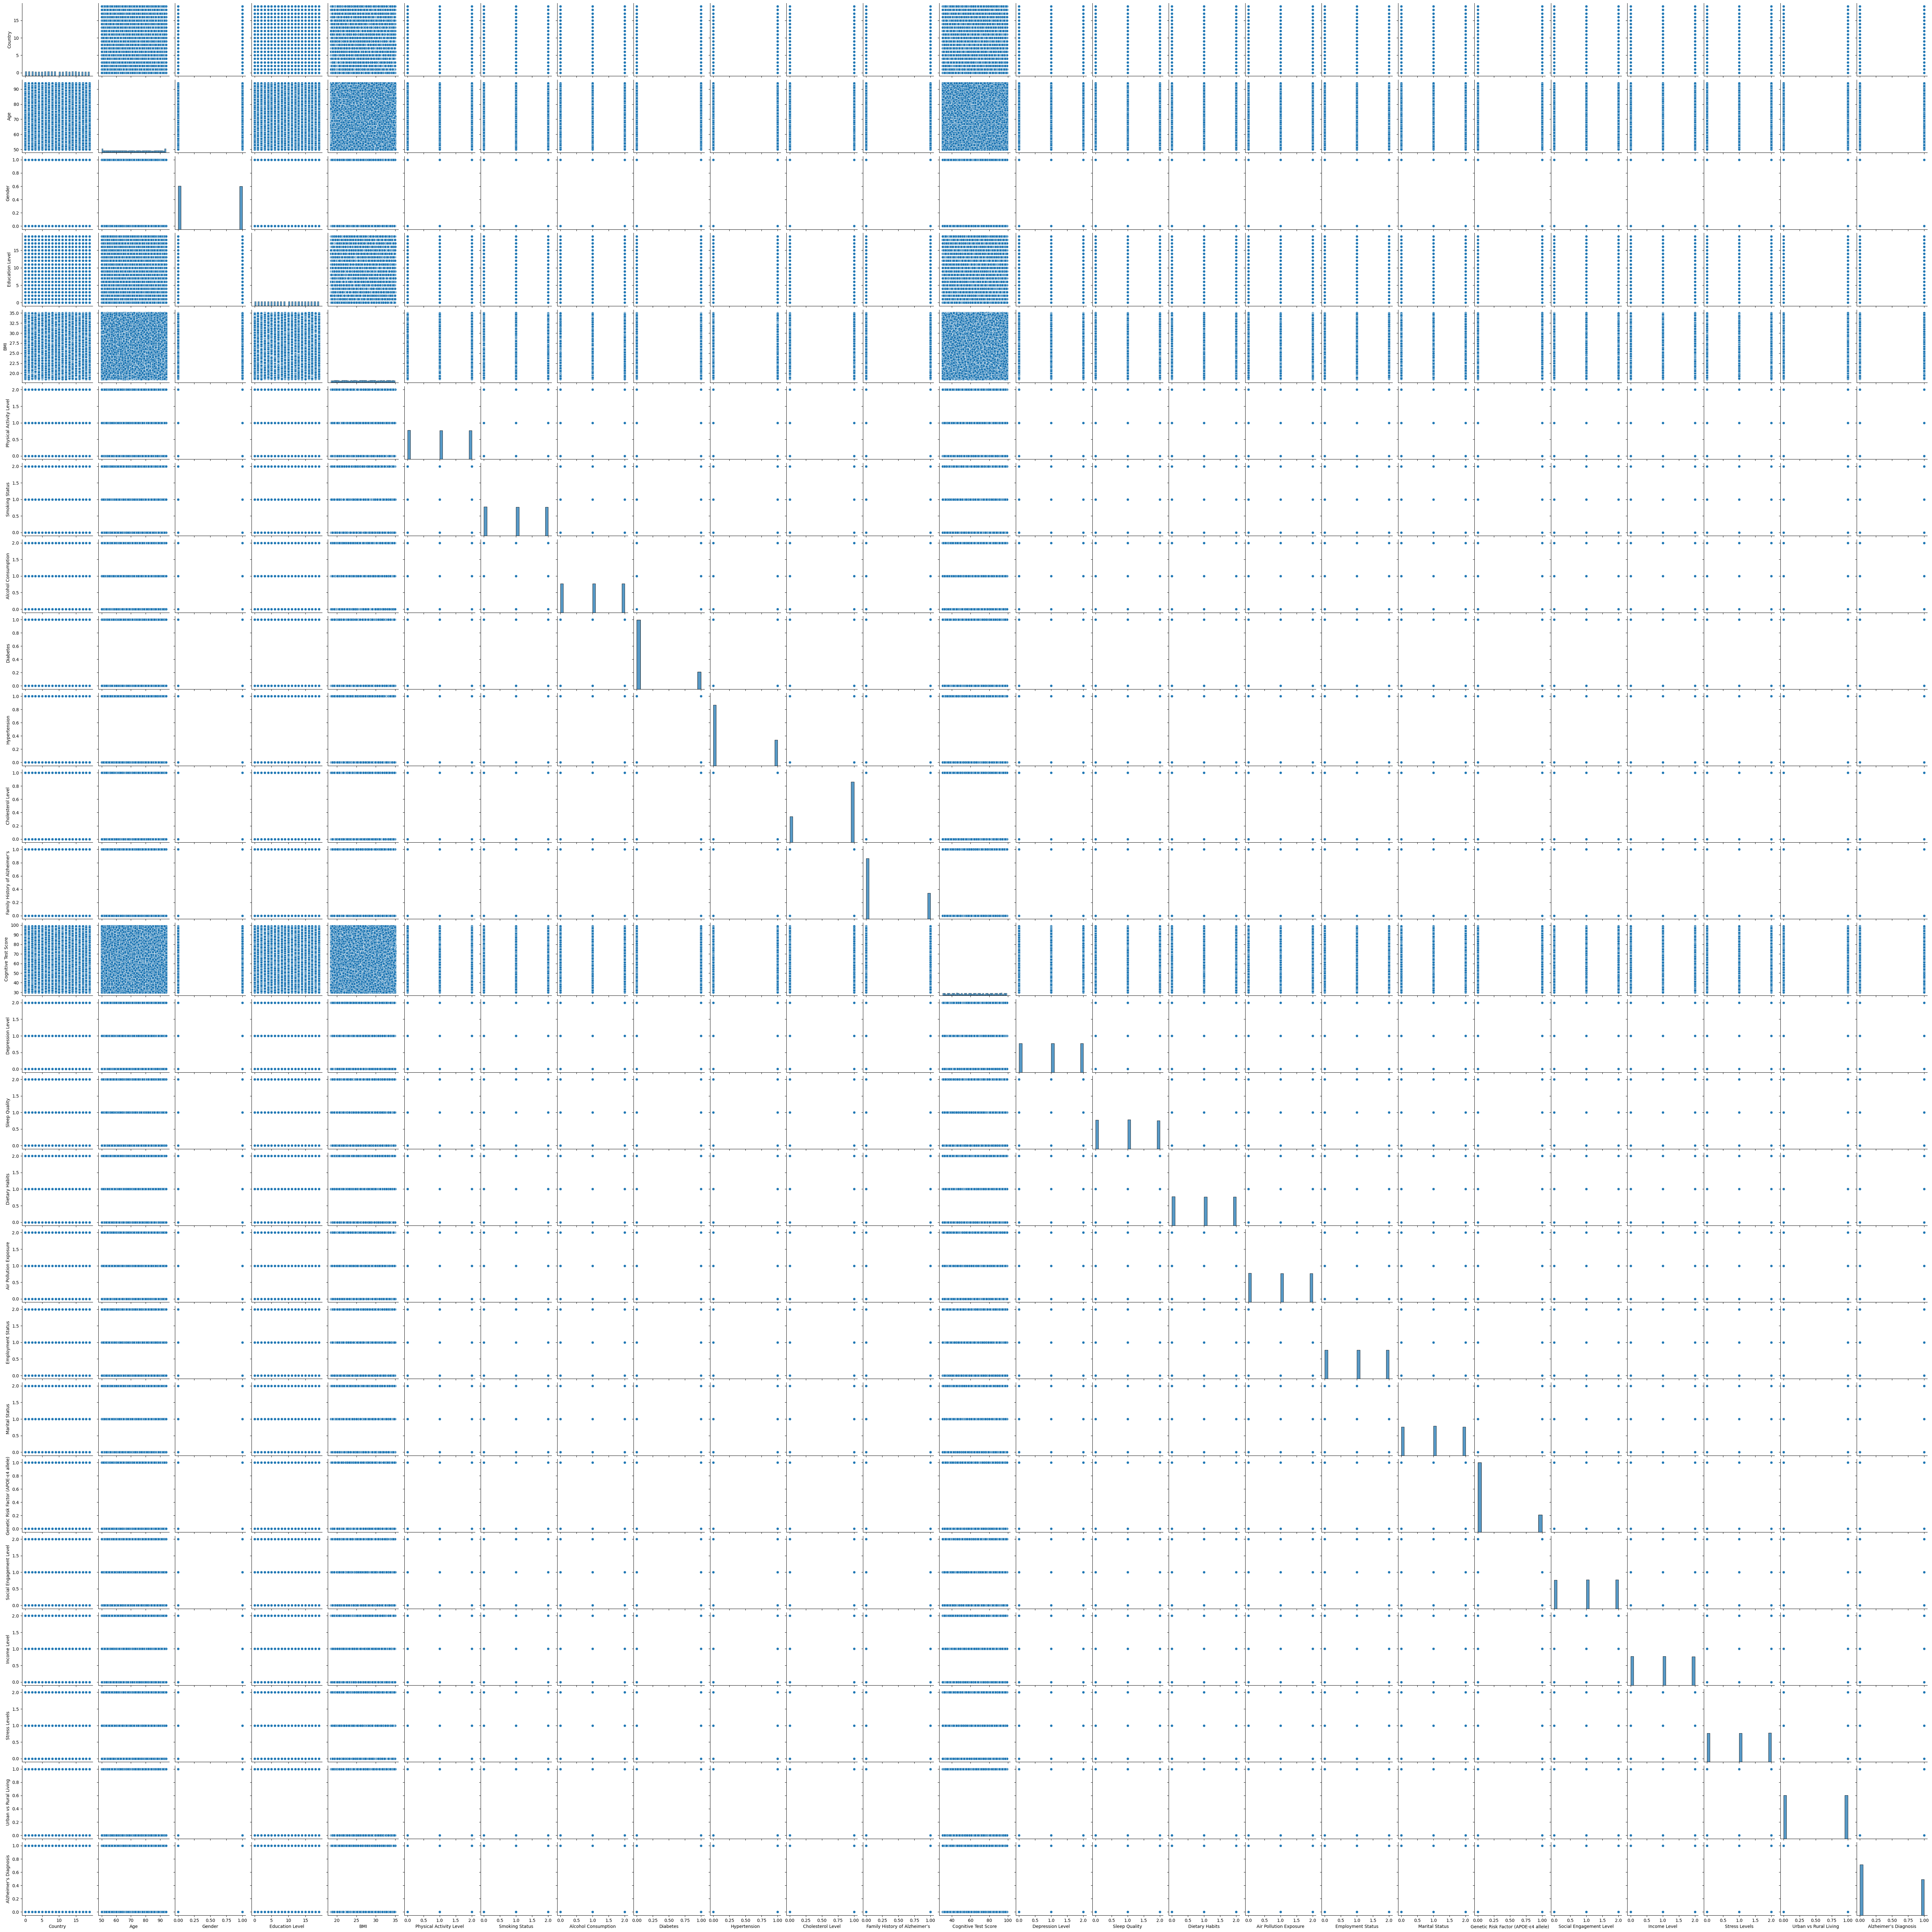

In [16]:
sns.pairplot(AlzData)

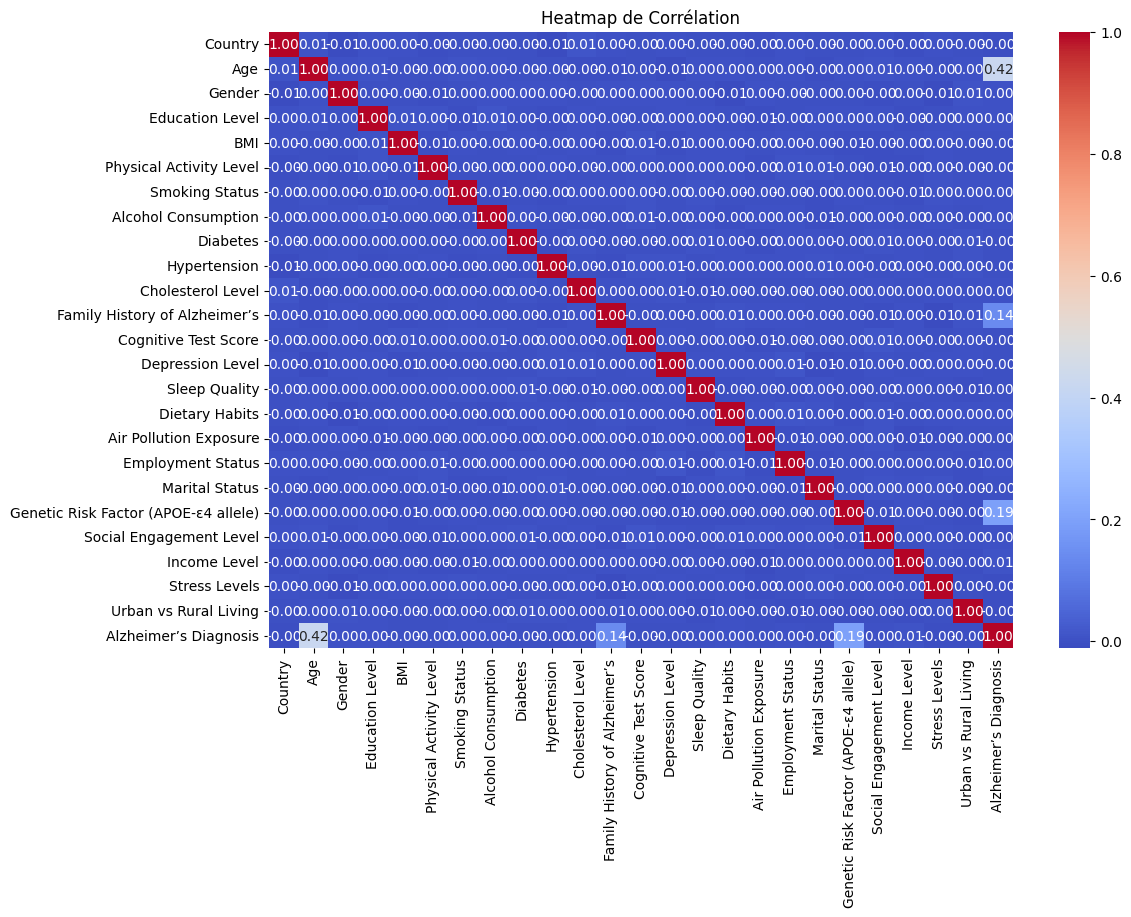

In [16]:
# Heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(AlzData.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Corrélation')
plt.show()

In [17]:
# Corrélation avec la cible
correlation_target = AlzData.corr()['Alzheimer’s Diagnosis'].sort_values(ascending=False)
print("\nCorrélation avec Alzheimer’s Diagnosis:")
print(correlation_target)


Corrélation avec Alzheimer’s Diagnosis:
Alzheimer’s Diagnosis                   1.000000
Age                                     0.419923
Genetic Risk Factor (APOE-ε4 allele)    0.194484
Family History of Alzheimer’s           0.140885
Income Level                            0.006209
Education Level                         0.003732
Smoking Status                          0.003690
Employment Status                       0.003514
Dietary Habits                          0.003239
Social Engagement Level                 0.002444
Cholesterol Level                       0.002104
Alcohol Consumption                     0.001790
Gender                                  0.001364
Sleep Quality                           0.000596
Air Pollution Exposure                  0.000083
Marital Status                         -0.001102
Cognitive Test Score                   -0.001142
Hypertension                           -0.001178
BMI                                    -0.001703
Depression Level            

In [18]:
# Séparer les caractéristiques (X) et la cible (y)
X = AlzData.drop(columns=['Alzheimer’s Diagnosis'])
y = AlzData['Alzheimer’s Diagnosis']

In [19]:
# Division des données : 80% train (qui sera divisé en train et validation), 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [20]:
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [21]:
# Définition des modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [22]:
# Hyperparamètres pour le tuning
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
}

In [27]:
# Évaluation des modèles avant tuning
print('\nAccuracy avant tuning:')
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name}: {test_accuracy:.4f}')


Accuracy avant tuning:
Logistic Regression: 0.7123
Decision Tree: 0.6334
Random Forest: 0.7210


In [28]:
# Hyperparamètres pour le tuning
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
}

In [29]:
# Entraînement, tuning et évaluation des modèles
best_models = {}
print('\nAccuracy après tuning:')
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    
    # Évaluation sur le jeu de validation
    y_val_pred = grid_search.best_estimator_.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy for {name}: {val_accuracy:.4f}')


Accuracy après tuning:
Best parameters for Logistic Regression: {'C': 0.01}
Validation Accuracy for Logistic Regression: 0.7035
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Validation Accuracy for Decision Tree: 0.7194
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Validation Accuracy for Random Forest: 0.7182



Final Test Accuracy après tuning:
Logistic Regression: 0.7123


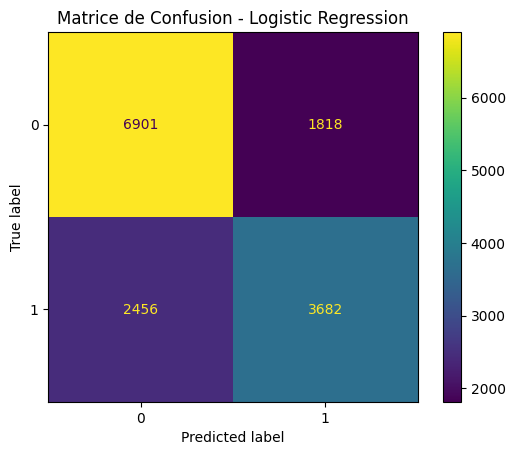

Decision Tree: 0.7254


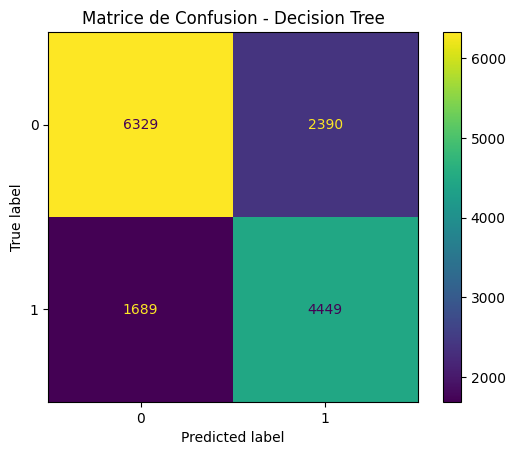

Random Forest: 0.7250


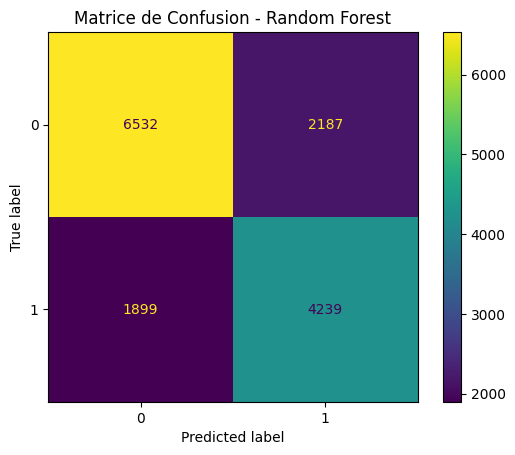

In [32]:
# Évaluation finale sur le jeu de test après tuning
print('\nFinal Test Accuracy après tuning:')
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name}: {test_accuracy:.4f}')
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Matrice de Confusion - {name}')
    plt.show()

In [33]:
AlzData = pd.read_csv('/Users/booba/Downloads/alzheimers_prediction_dataset.csv')

In [43]:
print(AlzData.shape)

(74283, 25)


In [34]:
# Encodage des variables catégoriques
label_encoders = {}
for col in AlzData.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    AlzData[col] = label_encoders[col].fit_transform(AlzData[col])

In [35]:
# Sélection des features les plus corrélées
selected_features = ['Age', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)']
X = AlzData[selected_features]
y = AlzData['Alzheimer’s Diagnosis']

In [36]:
# Division des données : 80% train (qui sera divisé en train et validation), 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [37]:
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [38]:
# Définition des modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [39]:
# Évaluation des modèles avant tuning
print('\nAccuracy avant tuning:')
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name}: {test_accuracy:.4f}')


Accuracy avant tuning:
Logistic Regression: 0.7117
Decision Tree: 0.7274
Random Forest: 0.7274


In [41]:
# Hyperparamètres pour le tuning
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
}

# Entraînement, tuning et évaluation des modèles
best_models = {}
print('\nAccuracy après tuning:')
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    
    # Évaluation sur le jeu de validation
    y_val_pred = grid_search.best_estimator_.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy for {name}: {val_accuracy:.4f}')


Accuracy après tuning:
Best parameters for Logistic Regression: {'C': 0.1}
Validation Accuracy for Logistic Regression: 0.7034
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Validation Accuracy for Decision Tree: 0.7194
Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 100}
Validation Accuracy for Random Forest: 0.7194



Final Test Accuracy après tuning:
Logistic Regression: 0.7117


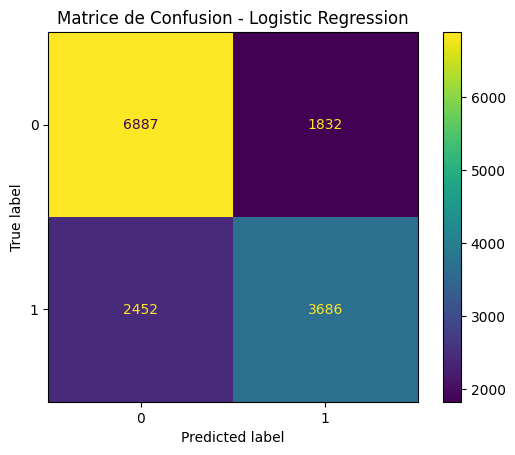

Decision Tree: 0.7254


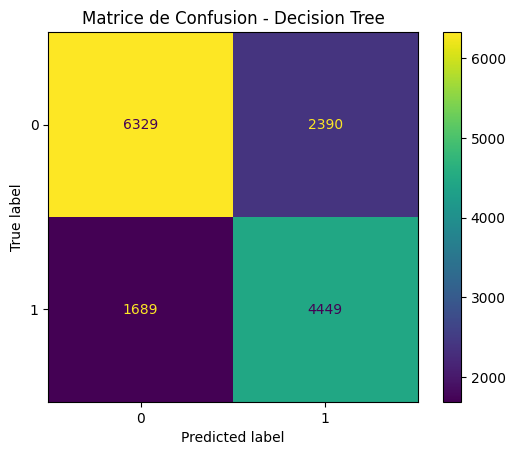

Random Forest: 0.7254


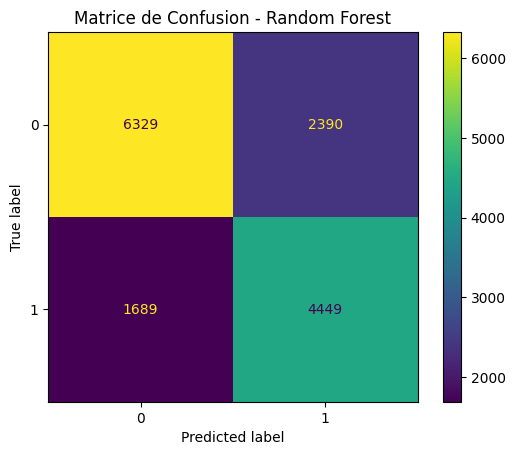

In [42]:
# Évaluation finale sur le jeu de test après tuning
print('\nFinal Test Accuracy après tuning:')
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name}: {test_accuracy:.4f}')
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Matrice de Confusion - {name}')
    plt.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier
# Définition du modèle KNN
knn = KNeighborsClassifier()

In [45]:
# Évaluation avant tuning
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'KNN Accuracy avant tuning: {test_accuracy:.4f}')

KNN Accuracy avant tuning: 0.6970


In [46]:
# Hyperparamètres pour le tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

print(f'Best parameters for KNN: {grid_search.best_params_}')

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [47]:
# Évaluation sur le jeu de validation
y_val_pred = best_knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy for KNN: {val_accuracy:.4f}')

Validation Accuracy for KNN: 0.6933


In [48]:
# Évaluation finale sur le jeu de test après tuning
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Final Test Accuracy après tuning: {test_accuracy:.4f}')

Final Test Accuracy après tuning: 0.6991


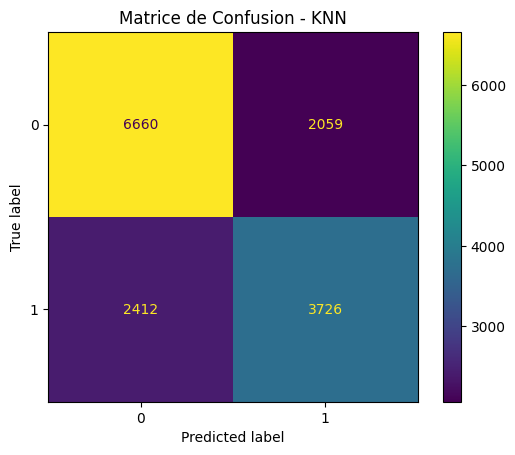

In [49]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matrice de Confusion - KNN')
plt.show()

In [50]:
AlzData = pd.read_csv('/Users/booba/Downloads/alzheimers_prediction_dataset.csv')

In [51]:
# Encodage des variables catégoriques
label_encoders = {}
for col in AlzData.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    AlzData[col] = label_encoders[col].fit_transform(AlzData[col])

In [52]:
# Sélection de toutes les features
X = AlzData.drop(columns=['Alzheimer’s Diagnosis'])
y = AlzData['Alzheimer’s Diagnosis']

In [53]:
# Division des données : 80% train (qui sera divisé en train et validation), 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [54]:
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [55]:
# Définition du modèle KNN
knn = KNeighborsClassifier()

In [56]:
# Évaluation avant tuning
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'KNN Accuracy avant tuning: {test_accuracy:.4f}')

KNN Accuracy avant tuning: 0.6474


In [58]:
# Hyperparamètres pour le tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

print(f'Best parameters for KNN: {grid_search.best_params_}')

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [59]:
# Évaluation sur le jeu de validation
y_val_pred = best_knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy for KNN: {val_accuracy:.4f}')

Validation Accuracy for KNN: 0.6569


In [60]:
# Évaluation finale sur le jeu de test après tuning
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Final Test Accuracy après tuning: {test_accuracy:.4f}')

Final Test Accuracy après tuning: 0.6597


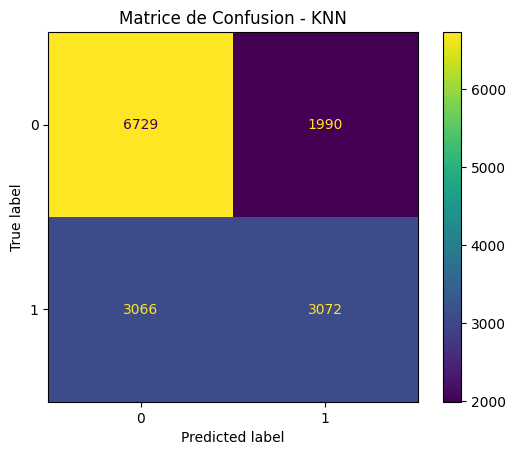

In [61]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matrice de Confusion - KNN')
plt.show()